# GeoNet FDSN webservice with Obspy demo - Station Service

This demo introduces some simple code that requests data using [GeoNet's FDSN webservices](http://www.geonet.org.nz/data/tools/FDSN) and the [obspy module](https://github.com/obspy/obspy/wiki) in python. This notebook uses Python 3. 

### Getting Started - Import Modules

In [1]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client as FDSN_Client
from obspy import read_inventory

### Define GeoNet FDSN client

In [2]:
client = FDSN_Client("GEONET")

## Accessing Station Metadata
Use the **station** service to access station metadata from GeoNet stations. 

Note, that metadata provided is prodominately associated with data types available from the FDSN archive, and therefore does not include things such as Geodetic station information. 

This example gets all stations that are operating at the time of the Kaikoura earthquake and that are located within a 0.5 degrees radius of the epicentre. It lists the station codes and plots them on a map. 

Inventory created at 2018-04-09T03:14:59.000000Z
	Created by: Delta
		    
	Sending institution: GeoNet (WEL(GNS_Test))
	Contains:
		Networks (1):
			NZ
		Stations (20):
			NZ.CECS (Cheviot Emergency Centre)
			NZ.CULC (Culverden Airlie Farm)
			NZ.GLWS (Glyn Wye)
			NZ.GVZ (Greta Valley)
			NZ.HSES (Hanmer Springs Emergency Centre)
			NZ.KHZ (Kahutara)
			NZ.LSRC (Lake Sumner Road)
			NZ.MS10 (Guide River)
			NZ.MS11 (Opera Range)
			NZ.MS12 (Leslie Hills)
			NZ.MS15 (Parnassus)
			NZ.SCAC (Scargill)
			NZ.SR051 (St. James Range)
			NZ.SR052 (West of Seaward Kaikoura range)
			NZ.SR056 (Hanmer Springs)
			NZ.SR057 (Glynn Wye Range)
			NZ.SR058 (Leader Road / Northeast of Waiau)
			NZ.WAKC (Waikari)
			NZ.WIGC (Waiau Gorge)
			NZ.WTMC (Te Mara Farm Waiau)
		Channels (0):



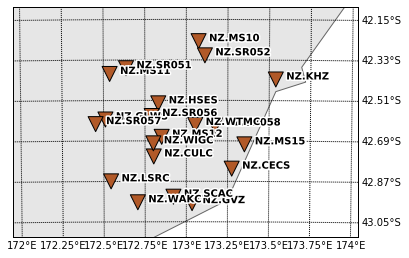

In [3]:
inventory = client.get_stations(latitude=-42.693,longitude=173.022,maxradius=0.5, starttime = "2016-11-13 11:05:00.000",endtime = "2016-11-14 11:00:00.000")
print(inventory)
_=inventory.plot(projection="local")

The following examples dive into retrieving different information from the inventory object. This object is based on FDSN stationXML and therefore can provide much the same information.

To get all available information into the inventory you will want to request data down to the response level. The default requests information just to a station level. For more information, see the [obspy inventory class](http://docs.obspy.org/packages/obspy.core.inventory.html#module-obspy.core.inventory). 

This example gets data from a station, KUZ, and prints a summary of the inventory contents

In [4]:
inventory = client.get_stations(station="KUZ",level="response",
                                starttime = "2016-11-13 11:05:00.000",endtime = "2016-11-14 11:00:00.000")
print(inventory)

Inventory created at 2018-04-09T03:14:59.000000Z
	Created by: Delta
		    
	Sending institution: GeoNet (WEL(GNS_Test))
	Contains:
		Networks (1):
			NZ
		Stations (1):
			NZ.KUZ (Kuaotunu)
		Channels (21):
			NZ.KUZ.10.EHE, NZ.KUZ.10.EHN, NZ.KUZ.10.EHZ, NZ.KUZ.10.HHE,
			NZ.KUZ.10.HHN, NZ.KUZ.10.HHZ, NZ.KUZ.10.LHE, NZ.KUZ.10.LHN,
			NZ.KUZ.10.LHZ, NZ.KUZ.10.VHE, NZ.KUZ.10.VHN, NZ.KUZ.10.VHZ,
			NZ.KUZ.20.BNE, NZ.KUZ.20.BNN, NZ.KUZ.20.BNZ, NZ.KUZ.20.HNE,
			NZ.KUZ.20.HNN, NZ.KUZ.20.HNZ, NZ.KUZ.20.LNE, NZ.KUZ.20.LNN,
			NZ.KUZ.20.LNZ


Now, we can look at more information, such as specifics about the station. Such as the time it opened and location. 

In [5]:
network = inventory[0]
station = network[0] # equivalent to inventory[0][0]
num_channels = len(station)
print(station)

Station KUZ (Kuaotunu)
	Station Code: KUZ
	Channel Count: 21/21 (Selected/Total)
	1990-10-11T00:00:00.000000Z - 
	Access: open 
	Latitude: -36.75, Longitude: 175.72, Elevation: 76.0 m
	Available Channels:
		KUZ.10.EHZ, KUZ.10.EHE, KUZ.10.EHN, KUZ.10.HHZ, KUZ.10.LHN,
		KUZ.10.LHE, KUZ.10.VHZ, KUZ.10.VHN, KUZ.10.VHE, KUZ.10.LHZ,
		KUZ.10.HHE, KUZ.10.HHN, KUZ.20.HNZ, KUZ.20.HNN, KUZ.20.HNE,
		KUZ.20.BNZ, KUZ.20.BNN, KUZ.20.BNE, KUZ.20.LNZ, KUZ.20.LNN,
		KUZ.20.LNE


We can drill down even futher into a particular channel and look at the time it was operating for, whether it was continously recording, the sample rate and some basic sensor information.

In [6]:
channel = station[0] # equivalent to inventory[0][0][0]
print(channel)

Channel 'EHZ', Location '10' 
	Time range: 1990-10-11T12:51:00.000000Z - 2003-05-05T18:52:00.000000Z
	Latitude: -36.75, Longitude: 175.72, Elevation: 76.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: -90.00 degrees down from horizontal
	Channel types: TRIGGERED, GEOPHYSICAL
	Sampling Rate: 50.00 Hz
	Sensor (Description): Short Period Seismometer (L4C-3D)
	Response information available


This channel states that there is response information available, so we can look at a summary of the response and plot it. 

Channel Response
	From m/s () to count ()
	Overall Sensitivity: 1.86437e+07 defined at 15.000 Hz
	4 stages:
		Stage 1: PolesZerosResponseStage from m/s to V, gain: 177.8
		Stage 2: PolesZerosResponseStage from V to V, gain: 1
		Stage 3: PolesZerosResponseStage from V to V, gain: 1
		Stage 4: CoefficientsTypeResponseStage from V to count, gain: 104858


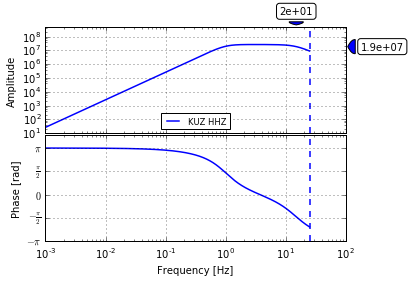

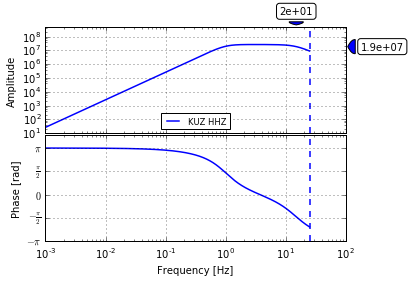

In [7]:
resp = channel.response
print(resp)
resp.plot(0.001,output="VEL",label='KUZ HHZ')